In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla/tsla.us.txt


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/tesla/tsla.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [6]:
data_len = len(df)
print(data_len)

1858


In [7]:
train_size = int(data_len*0.8)
print(train_size)

1486


In [8]:
train_data = df[0:train_size]

In [9]:
train_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1481,2016-05-17,209.05,209.82,204.02,204.66,2303002,0
1482,2016-05-18,209.15,215.31,207.75,211.17,4454848,0
1483,2016-05-19,213.62,216.79,207.30,215.21,6582419,0
1484,2016-05-20,216.99,220.55,216.35,220.28,8635216,0
1485,2016-05-23,219.87,222.60,215.86,216.22,4335487,0


In [10]:
test_data = df[train_size:data_len]

In [11]:
test_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [12]:
len(test_data)

372

In [13]:
train_array = train_data.loc[:,['Open']].values
test_array = test_data.loc[:,['Open']].values

In [14]:
train_array

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [15]:
scaler = MinMaxScaler()

In [16]:
train_scaled = scaler.fit_transform(train_array)

In [17]:
len(train_scaled)

1486

In [18]:
train_scaled[40:80]

array([[0.01145361],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.01311089],
       [0.01296358],
       [0.01281626],
       [0.01557839],
       [0.01741981],
       [0.01646227],
       [0.01664641],
       [0.01789857],
       [0.01697787],
       [0.01749346],
       [0.01620447],
       [0.01782492],
       [0.02213383],
       [0.01797223],
       [0.01668324],
       [0.01749346],
       [0.01741981],
       [0.01381063],
       [0.0140316 ],
       [0.01568887],
       [0.01804589],
       [0.01859831],
       [0.02158141],
       [0.0167569 ],
       [0.01579936],
       [0.018451  ],
       [0.01811954],
       [0.01631496],
       [0.01579936],
       [0.01583619],
       [0.01495231],
       [0.01657275],
       [0.01789857],
       [0.01749346],
       [0.01613081],
       [0.01495231]])

In [19]:
time_step = 40

x_train = []
y_train =  []

for i in range(time_step, len(train_scaled)):
    x_train.append(train_scaled[i-time_step:i,0])
    y_train.append(train_scaled[i,0])

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [21]:
x_train

array([[0.00316724, 0.01053291, 0.03553935, ..., 0.0088388 , 0.00924391,
        0.01086436],
       [0.01053291, 0.03553935, 0.03262991, ..., 0.00924391, 0.01086436,
        0.01145361],
       [0.03553935, 0.03262991, 0.02526424, ..., 0.01086436, 0.01145361,
        0.01112216],
       ...,
       [0.79633926, 0.73524104, 0.79354031, ..., 0.70714102, 0.71045557,
        0.71082385],
       [0.73524104, 0.79354031, 0.78720583, ..., 0.71045557, 0.71082385,
        0.72728612],
       [0.79354031, 0.78720583, 0.80635657, ..., 0.71082385, 0.72728612,
        0.73969727]])

In [22]:
y_train

array([0.01145361, 0.01112216, 0.01381063, ..., 0.72728612, 0.73969727,
       0.75030383])

In [23]:
x_train.shape

(1446, 40)

In [24]:
y_train.shape

(1446,)

In [25]:
x_train.shape[0],x_train.shape[1],1

(1446, 40, 1)

In [65]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [107]:
## RNN
rnn_model = Sequential()

rnn_model.add(SimpleRNN(50, activation = 'tanh',
                        return_sequences = True,
                       input_shape = (x_train.shape[1],1)))

rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(50, activation = 'tanh',
                        return_sequences = True))

rnn_model.add(SimpleRNN(50))


rnn_model.add(Dense(1))

In [108]:
rnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 40, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 40, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 40, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
rnn_model.compile(optimizer = 'adam',
             loss = 'mse')

In [110]:
rnn_model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1273
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017


In [111]:
total_data = pd.concat((df['Open'],test_data['Open']),axis = 0)

In [112]:
total_data

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [113]:
total_data.shape

(2230,)

In [114]:
inputs = total_data[len(total_data)-len(test_data)-time_step:].values.reshape(-1,1)

In [115]:
type(inputs)

numpy.ndarray

In [116]:
inputs.shape

(412, 1)

In [117]:
x_test = []

for i in range(time_step,len(inputs)):
    x_test.append(inputs[i-time_step:i-0])

In [118]:
x_test = np.array(x_test)
x_test.shape

(372, 40, 1)

In [119]:
rnn_pred = rnn_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [120]:
rnn_pred = scaler.inverse_transform(rnn_pred)

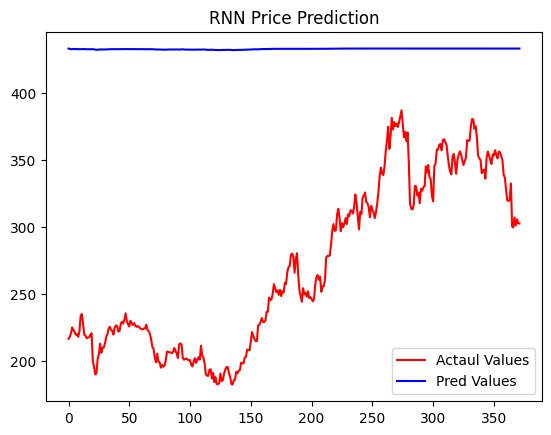

In [121]:
plt.plot(test_array, color = 'red',label = 'Actaul Values')
plt.plot(rnn_pred, color = 'blue',label = 'Pred Values')
plt.title('RNN Price Prediction')
plt.legend()
plt.show()

In [101]:
## LSTM
LSTM_model = Sequential()

LSTM_model.add(LSTM(50, activation = 'tanh',
                        return_sequences = True,
                       input_shape = (x_train.shape[1],1)))

LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(50, activation = 'tanh',
                        return_sequences = True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(70))


LSTM_model.add(Dense(1))

In [102]:
LSTM_model.compile(optimizer = 'adam',
             loss = 'mse')

In [103]:
LSTM_model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0620
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017


In [104]:
LSTM_pred = LSTM_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


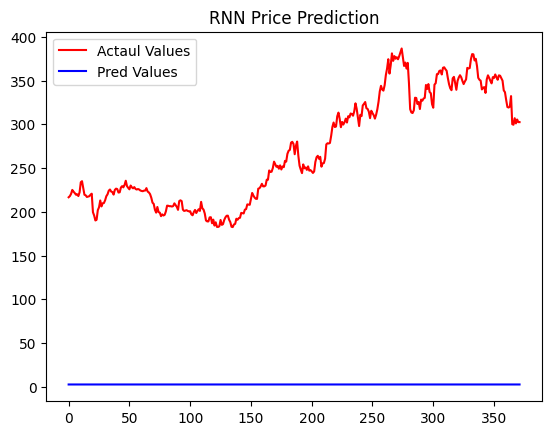

In [105]:
plt.plot(test_array, color = 'red',label = 'Actaul Values')
plt.plot(LSTM_pred, color = 'blue',label = 'Pred Values')
plt.title('RNN Price Prediction')
plt.legend()
plt.show()